## Étape 1 : Création des CSV finaux à partir des données de l'INSEE

In [ ]:
import duckdb

#### Données pour le taux de pauvreté

In [ ]:
duckdb.sql("SELECT CODGEO as GEO, TP4021, TP5021, TP6021 \
            FROM 'base_data/FILO2021_DISP_PAUVRES_COM.csv' \
            WHERE TP5021 != 's'").write_csv('./final_data/pauv2021.csv')


┌─────────┬─────────┬─────────┬─────────┐
│   GEO   │ TP4021  │ TP5021  │ TP6021  │
│ varchar │ varchar │ varchar │ varchar │
├─────────┼─────────┼─────────┼─────────┤
│ 01004   │ 5,0     │ 9,0     │ 17,0    │
│ 01014   │ s       │ 7,0     │ 13,0    │
│ 01031   │ s       │ 11,0    │ 20,0    │
│ 01033   │ 6,0     │ 11,0    │ 17,0    │
│ 01034   │ 5,0     │ 10,0    │ 18,0    │
│ 01053   │ 7,0     │ 13,0    │ 24,0    │
│ 01071   │ s       │ 5,0     │ 7,0     │
│ 01093   │ s       │ 5,0     │ 10,0    │
│ 01142   │ s       │ 5,0     │ 9,0     │
│ 01143   │ 5,0     │ 6,0     │ 8,0     │
│   ·     │  ·      │  ·      │  ·      │
│   ·     │  ·      │  ·      │  ·      │
│   ·     │  ·      │  ·      │  ·      │
│ 97415   │ 10,0    │ 20,0    │ 30,0    │
│ 97416   │ 11,0    │ 23,0    │ 34,0    │
│ 97417   │ 14,0    │ 28,0    │ 43,0    │
│ 97418   │ 9,0     │ 20,0    │ 30,0    │
│ 97419   │ 17,0    │ 34,0    │ 49,0    │
│ 97420   │ 11,0    │ 23,0    │ 34,0    │
│ 97421   │ 21,0    │ 37,0    │ 54

#### Données sur le taux de locataires / propriétaires

In [ ]:
duckdb.sql("SELECT CODGEO as GEO, P21_RP_PROP, P21_RP_LOC \
            FROM 'base_data/base-cc-logement-2021.CSV'").write_csv('./final_data/prop_loc2021.csv')


┌─────────┬──────────────────┬──────────────────┐
│   GEO   │   P21_RP_PROP    │    P21_RP_LOC    │
│ varchar │      double      │      double      │
├─────────┼──────────────────┼──────────────────┤
│ 01001   │ 292.172831181122 │ 47.1325549002898 │
│ 01002   │ 101.578666472362 │ 11.3851958208619 │
│ 01004   │ 2899.11660826546 │ 3913.53469957631 │
│ 01005   │ 581.510357899193 │ 199.092413871919 │
│ 01006   │  40.640350877193 │ 14.8684210526316 │
│ 01007   │ 877.693174608471 │ 312.213215115163 │
│ 01008   │ 246.916084795144 │ 79.8243717730483 │
│ 01009   │ 129.102494386847 │  19.636462673799 │
│ 01010   │ 384.617110948143 │ 90.3159510183047 │
│ 01011   │ 121.565647921315 │ 36.3024429023619 │
│   ·     │         ·        │         ·        │
│   ·     │         ·        │         ·        │
│   ·     │         ·        │         ·        │
│ 28094   │ 569.620573744025 │ 109.638869490375 │
│ 28095   │ 105.192208134585 │ 9.36388850546321 │
│ 28096   │ 414.808337015146 │ 95.1848063839821 │


#### Données recensement population (sexe, âge, CSP)

In [ ]:
duckdb.sql("SELECT GEO, SEX, PCS, AGE, OBS_VALUE \
            FROM 'base_data/DS_RP_POPULATION_COMP_data.csv' \
            WHERE GEO_OBJECT = 'COM'" ).write_csv('./final_data/population2021.csv')

┌─────────┬─────────┬─────────┬─────────┬───────────┐
│   GEO   │   SEX   │   PCS   │   AGE   │ OBS_VALUE │
│ varchar │ varchar │ varchar │ varchar │  double   │
├─────────┼─────────┼─────────┼─────────┼───────────┤
│ 64026   │ F       │ 9       │ Y15T24  │   13.5532 │
│ 64173   │ F       │ 9       │ Y25T54  │   4.99984 │
│ 64109   │ F       │ 2       │ Y_GE55  │   5.49095 │
│ 64105   │ M       │ 1       │ Y25T54  │  10.01385 │
│ 64080   │ F       │ 6       │ Y15T24  │   4.54719 │
│ 64302   │ M       │ 1       │ Y_GE55  │   5.29287 │
│ 65297   │ M       │ 6       │ Y25T54  │    4.7619 │
│ 64455   │ M       │ 6       │ Y25T54  │   9.70238 │
│ 65294   │ M       │ 5       │ Y25T54  │    4.9095 │
│ 64524   │ F       │ 5       │ Y_GE55  │  10.03056 │
│   ·     │ ·       │ ·       │   ·     │      ·    │
│   ·     │ ·       │ ·       │   ·     │      ·    │
│   ·     │ ·       │ ·       │   ·     │      ·    │
│ 62486   │ M       │ 6       │ Y25T54  │  94.78887 │
│ 62297   │ F       │ 4     

#### Enregistrement des communes et de leur code
Toutes les données sur les communes ne sont pas égales dans les différentes méta-données
- Récupération des données unique
- RP 2021 utilise des noms de colonnes différentes et certaines communes sont numérotées différemment 

In [ ]:
duckdb.sql("""
            SELECT COD_VAR, LIB_VAR, COD_MOD, LIB_MOD 
            FROM 'base_data/meta_base-cc-logement-2021.CSV' 
            WHERE COD_VAR = 'CODGEO' 
            UNION DISTINCT
            SELECT COD_VAR, LIB_VAR, COD_MOD, LIB_MOD 
            FROM 'base_data/meta_FILO2021_DISP_PAUVRES_COM.csv' 
            WHERE COD_VAR = 'CODGEO' 
            
            ORDER BY COD_MOD
            """).to_csv("final_data/communes.csv")

┌─────────┬───────────────────┬─────────┬─────────────────────────┐
│ COD_VAR │      LIB_VAR      │ COD_MOD │         LIB_MOD         │
│ varchar │      varchar      │ varchar │         varchar         │
├─────────┼───────────────────┼─────────┼─────────────────────────┤
│ CODGEO  │ Code commune      │ 01001   │ L'Abergement-Clémenciat │
│ CODGEO  │ Code géographique │ 01001   │ L'Abergement-Clémenciat │
│ CODGEO  │ Code commune      │ 01002   │ L'Abergement-de-Varey   │
│ CODGEO  │ Code géographique │ 01002   │ L'Abergement-de-Varey   │
│ CODGEO  │ Code commune      │ 01004   │ Ambérieu-en-Bugey       │
│ CODGEO  │ Code géographique │ 01004   │ Ambérieu-en-Bugey       │
│ CODGEO  │ Code commune      │ 01005   │ Ambérieux-en-Dombes     │
│ CODGEO  │ Code géographique │ 01005   │ Ambérieux-en-Dombes     │
│ CODGEO  │ Code géographique │ 01006   │ Ambléon                 │
│ CODGEO  │ Code commune      │ 01006   │ Ambléon                 │
│   ·     │      ·            │   ·     │    ·  

##### Suppression des duppliqués code commune

In [ ]:
communes_df = duckdb.sql("SELECT * FROM 'final_data/communes.csv'").to_df()

not_dup_geo = communes_df[communes_df["COD_MOD"].duplicated(keep=False) == False]["COD_MOD"].tolist()
communes_df_ungeo = communes_df[communes_df["COD_MOD"].isin(not_dup_geo) | (communes_df["LIB_VAR"] == "Code géographique")]
print(communes_df_ungeo["COD_MOD"].value_counts())
communes_df_ungeo.to_csv('final_data/communes.csv', sep=';', index_label='index')

COD_MOD
97424    1
01001    1
01002    1
01004    1
01005    1
        ..
01017    1
01016    1
01015    1
01014    1
01013    1
Name: count, Length: 34987, dtype: int64


In [121]:
duckdb.sql("SELECT * FROM 'final_data/communes.csv' WHERE LIB_MOD = 'Lécluse'")

┌───────┬─────────┬─────────┬───────────────────┬─────────┬─────────┐
│ index │ index_1 │ COD_VAR │      LIB_VAR      │ COD_MOD │ LIB_MOD │
│ int64 │  int64  │ varchar │      varchar      │ varchar │ varchar │
├───────┼─────────┼─────────┼───────────────────┼─────────┼─────────┤
│ 22139 │   44262 │ CODGEO  │ Code géographique │ 59336   │ Lécluse │
└───────┴─────────┴─────────┴───────────────────┴─────────┴─────────┘

#### Problème : De nombreuses communes partagent le même nom

In [94]:
duckdb.sql("""
            SELECT COD_VAR, LIB_VAR, LIB_MOD, COUNT(LIB_MOD) AS nb , STRING_AGG(COD_MOD) AS c FROM 'final_data/communes.csv'
            GROUP BY (COD_VAR, LIB_VAR, LIB_MOD)
            HAVING nb > 3
           """)

┌─────────┬───────────────────┬──────────────────┬───────┬─────────────────────────────────────────────────┐
│ COD_VAR │      LIB_VAR      │     LIB_MOD      │  nb   │                        c                        │
│ varchar │      varchar      │     varchar      │ int64 │                     varchar                     │
├─────────┼───────────────────┼──────────────────┼───────┼─────────────────────────────────────────────────┤
│ CODGEO  │ Code géographique │ Brion            │     7 │ 01063,36026,38060,48031,71062,86038,89056       │
│ CODGEO  │ Code géographique │ Montfaucon       │     4 │ 02505,25395,30178,46204                         │
│ CODGEO  │ Code géographique │ Saint-Loup       │     8 │ 03242,17356,23209,39490,41222,50505,51495,82165 │
│ CODGEO  │ Code géographique │ La Trinité       │     5 │ 06149,27659,50607,73302,97230                   │
│ CODGEO  │ Code géographique │ Beaumont         │     8 │ 07029,19020,32037,43022,54057,63032,74031,89031 │
│ CODGEO  │ Code gé

In [ ]:
# Si plusieurs communes possèdent le même nom, il faut spécifier le département
def get_city_code(city, dep=None):
    if dep is None:
        query = f"SELECT * FROM 'final_data/communes.csv' WHERE LIB_MOD = '{city}'"
    else:
        query = f"""
                SELECT * FROM 'final_data/communes.csv' 
                WHERE LIB_MOD = '{city}' AND COD_MOD LIKE '{dep}%'
                """
    df = duckdb.sql(query).to_df()
    if len(df) > 1:
        print(df)
        raise Exception("Plusieurs communes possèdent ce nom, veuillez préciser le département.")
    return df.loc[0, "COD_MOD"]

get_city_code("Saint-Denis", dep=93)

'93066'

## Étape 2 : Visualisation

### Visualisation des CSP

#### Exemple pour Lyon

([<matplotlib.patches.Wedge at 0x7f77a8797820>,
 [Text(1.0999996410110722, 0.0008886931486845544, 'Agriculteurs exploitants'),
  Text(1.0956932419247074, 0.09724360956137255, "Artisans, commerçants et chefs d'entreprise"),
  Text(0.77769035495962, 0.7779445428838616, 'Cadres et professions intellectuelles supérieures'),
  Text(-0.39709364625979726, 1.025824856444851, 'Professions Intermédiaires'),
  Text(-1.0777512316401126, 0.22011879224232714, 'Employés'),
  Text(-0.9840396417081456, -0.4915953453267277, 'Ouvriers'),
  Text(-0.3527228288135214, -1.041914874658092, 'Retraités'),
  Text(0.8671828212569747, -0.6767525061030761, 'Autres personnes sans activité professionnelle')],
 [Text(0.5999998041878575, 0.0004847417174643024, '0.0%'),
  Text(0.5976508592316585, 0.05304196885165775, '2.8%'),
  Text(0.4241947390688836, 0.42433338702756085, '19.4%'),
  Text(-0.21659653432352574, 0.5595408307881005, '17.3%'),
  Text(-0.587864308167334, 0.12006479576854207, '14.5%'),
  Text(-0.536748895477

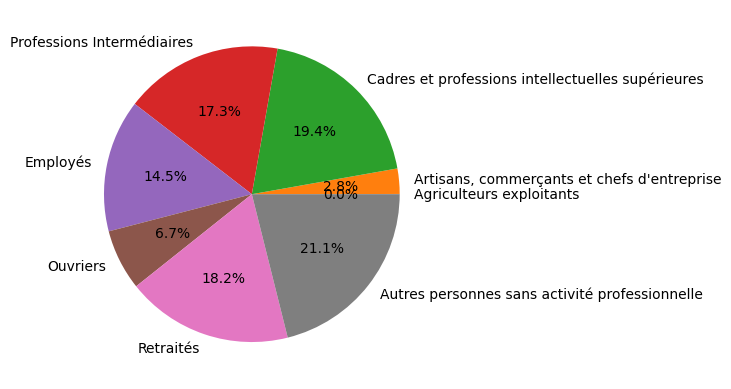

In [122]:
import matplotlib.pyplot as plt

CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

geocode_lyon = get_city_code("Lyon")
df = duckdb.sql(f"""
                SELECT GEO, SEX, PCS, SUM(OBS_VALUE) as VALUE
                FROM read_csv('final_data/population2021.csv', columns = {{'GEO': 'VARCHAR','SEX': 'VARCHAR','PCS': 'VARCHAR','AGE': 'VARCHAR','OBS_VALUE': 'FLOAT'}}) 
                WHERE GEO = '{geocode_lyon}' AND PCS != '_T' AND SEX = '_T'
                GROUP BY GEO, SEX, PCS
                ORDER BY PCS
                """).to_df()
sizes = df["VALUE"].tolist()
# sizes = rp_df_sorted[(rp_df_sorted["GEO"] == geocode_lyon) & (rp_df_sorted["PCS"] != "_T")]["OBS_VALUE"].tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=CS1_8_labels, autopct="%1.1f%%")

#### Pour n'importe quelle commune

Les données de catégorie socioprofessionnelles utilisent la nomenclature [PCS-2003](https://www.insee.fr/fr/metadonnees/pcs2003/categorieSocioprofessionnelleAgregee/1).

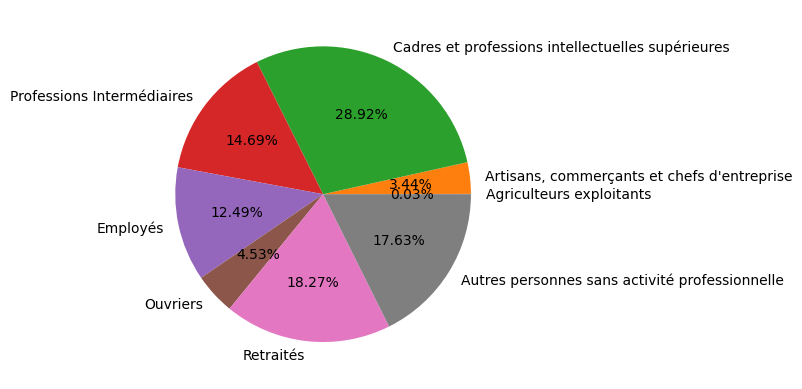

In [123]:
CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

def chart_from_city(city, dep=None, type="bar"):
    geocode = get_city_code(city, dep)
    df = duckdb.sql(f"""
                    SELECT GEO, SEX, PCS, SUM(OBS_VALUE) as VALUE
                    FROM read_csv('final_data/population2021.csv', columns = {{'GEO': 'VARCHAR','SEX': 'VARCHAR','PCS': 'VARCHAR','AGE': 'VARCHAR','OBS_VALUE': 'FLOAT'}}) 
                    WHERE GEO = '{geocode}' AND PCS != '_T' AND SEX = '_T'
                    GROUP BY GEO, SEX, PCS
                    ORDER BY PCS
                    """).to_df()
    sizes = df["VALUE"].tolist()

    fig, ax = plt.subplots()
    if type == "pie":
        ax.pie(sizes, labels=CS1_8_labels, autopct='%.2f%%')
    else:
        bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:grey', 'royalblue', 'cyan', 'purple', 'orange']
        ax.bar(CS1_8_labels, sizes, color=bar_colors)
        for container in ax.containers:
            print([x / sum(sizes) for x in sizes])
        ax.bar_label(container, [f'{x / sum(sizes):.2%}' for x in sizes])
        plt.xticks(rotation=50, ha='right')


chart_from_city("Paris", type="pie")

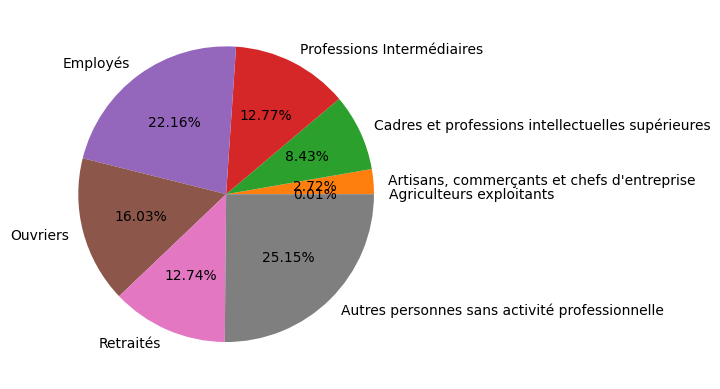

In [124]:
chart_from_city("Saint-Denis", dep=93, type="pie")

### Visualisation du taux de pauvreté

36,0


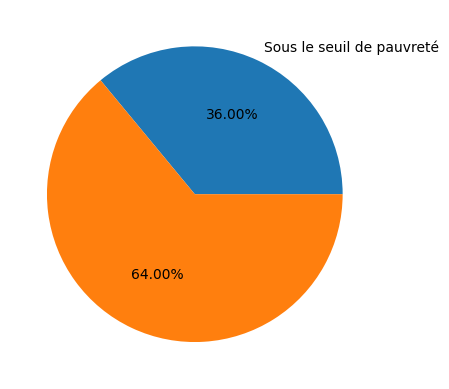

In [129]:
def draw_poverty_pie(city, dep=None, poverty_threshold=0.6):
    if poverty_threshold not in [0.4, 0.5, 0.6]:
        raise ValueError("poverty_threshold must be one of [0.4, 0.5, 0.6]")
    if poverty_threshold == 0.4:
        var_code = 'TP4021'
    elif poverty_threshold == 0.5:
        var_code = 'TP5021'
    else:
        var_code = 'TP6021'

    geo_code = get_city_code(city, dep)
    
    df = duckdb.sql(
                f"""
                SELECT {var_code}
                FROM 'final_data/pauv2021.csv'
                WHERE GEO = '{geo_code}'
                """).to_df()
    
    poverty_rate = df.loc[0, var_code]
    
    print(poverty_rate)
    if poverty_rate == 's':
        print("Pas de données pour cette commune")
        return
    poverty_rate = float(poverty_rate.replace(',', '.'))

    fig, ax = plt.subplots()
    ax.pie([poverty_rate, 100 - poverty_rate], labels=["Sous le seuil de pauvreté", ""], autopct='%.2f%%')
    
draw_poverty_pie('Saint-Denis',dep=93)


### Visualisation du nombre de locataires / propriétaires

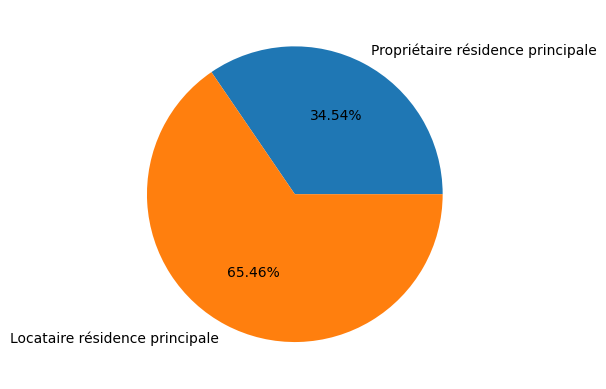

In [127]:
def draw_nb_loc_pie(city):
    geo_code = get_city_code(city)


    df = duckdb.sql(f"""
                    SELECT * 
                    FROM 'final_data/prop_loc2021.csv'
                    WHERE GEO = '{geo_code}'
                    """).to_df()

    pro_log_rp = df['P21_RP_PROP'].iloc[0]
    loc_log_rp = df['P21_RP_LOC'].iloc[0]

    fig, ax = plt.subplots()
    ax.pie([pro_log_rp, loc_log_rp], labels=["Propriétaire résidence principale", "Locataire résidence principale"], autopct='%.2f%%')

draw_nb_loc_pie('Lyon')